In [29]:
import pandas as pd
df = pd.read_csv("Weekly.csv")
print(df.head())
print(df.info())
print(df.describe())
# for checking if there are any null values in the data, and if so, how many rows have null values.
df[df.isnull()==True].count()

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
Year         1089 non-null int64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB
None
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


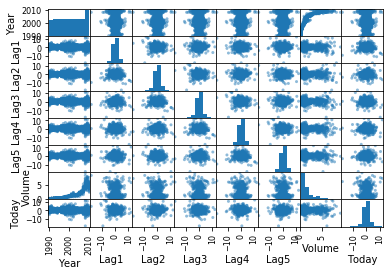

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot scatter matrix plot of the dataframe
pd.plotting.scatter_matrix(df,figsize=None)
df.corr()

In [32]:
def numeric_direction(value):
    if value == 'Up':
        return 1
    if value == 'Down':
        return 0
# Test the function if it is generating correct values
print("Value of Up is %d" %numeric_direction('Up'))
print("Value of Down is %d" % numeric_direction('Down'))

Value of Up is 1
Value of Down is 0


1. (a) There are no null values in the data.
    (b) Graphical Summaries were provided above.
        No correleation between Today's return and previous day's return.
        No patterns were observed but incase of volume-year relation, it
        seems like there has as exponential relation.

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,nDirection
Year,1,0.0322893,0.03339,0.0300065,0.0311279,0.0305191,0.841942,0.0324599,0.0222002
Lag1,0.0322893,1,0.0748531,0.0586357,0.0712739,0.0081831,0.0649513,0.0750318,0.0500038
Lag2,0.03339,0.0748531,1,0.0757209,0.0583815,0.0724995,0.0855131,0.0591667,0.0726963
Lag3,0.0300065,0.0586357,0.0757209,1,0.0753959,0.0606572,0.0692877,0.0712436,0.0229128
Lag4,0.0311279,0.0712739,0.0583815,0.0753959,1,0.075675,0.0610746,0.00782587,0.0205495
Lag5,0.0305191,0.0081831,0.0724995,0.0606572,0.075675,1,0.0585174,0.0110127,0.0181683
Volume,0.841942,0.0649513,0.0855131,0.0692877,0.0610746,0.0585174,1,0.0330778,0.0179952
Today,0.0324599,0.0750318,0.0591667,0.0712436,0.00782587,0.0110127,0.0330778,1,0.720025
nDirection,0.0222002,0.0500038,0.0726963,0.0229128,0.0205495,0.0181683,0.0179952,0.720025,1


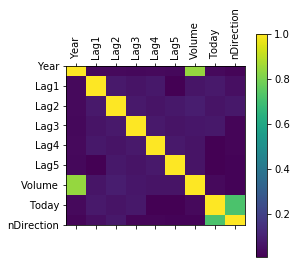

In [33]:
df['nDirection'] = df['Direction'].apply(numeric_direction)
df.head()
df = df.drop('Direction',1)
df.head()
#Previously the scatter matrix plot did not display 'Direction' as it has a non-numeric datatype.
wcorr = df.corr()
plt.matshow(wcorr.abs())
plt.colorbar()
plt.xticks(range(len(wcorr.columns)), wcorr.columns, rotation='vertical');
plt.yticks(range(len(wcorr.columns)),wcorr.columns);

# another way of displaying the correleations
wcorr.abs().style.background_gradient()
# So, now we can see correlations involving 'nDirection'

2. (a) The datatype of the class variable Direction is string which later was converted
        converted to numeric datatype.
        

In [37]:
import statsmodels.formula.api as sm
#fit the logistic regression model
model_1 = sm.logit("nDirection ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume",df).fit()
print(dir(model_1))
#print the summary of the results of model_1.
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_endog_name', '_get_robustcov_results', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generalized', 'resid_pearson', 'resid_response', 'save', 'scale', 'set_null_optio

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             nDirection   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 04 Feb 2020   Pseudo R-squ.:                0.006580
Time:                        10:34:26   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [44]:
#p-value tell us about statistical significant association between
#individual predictors and response
# Find the predictors that are statistically significant.
for i in model_1.predict():
    print(i)

0.6086249443353893
0.6010314365654373
0.5875699459348145
0.4816415636224413
0.6169012922265767
0.5684190189450131
0.5786097146142697
0.5151972436920016
0.5715199752941564
0.5554287337033006
0.6092096451019695
0.5370125467014486
0.5125262700339047
0.5858983701413363
0.6248678821573769
0.5475215067963325
0.4993611842488266
0.5929660300596539
0.523524119631645
0.5914015386098317
0.523319916404927
0.5793948195960753
0.5487893489600224
0.6177056220663215
0.5527998616961902
0.5460342995654698
0.5685317968768248
0.580312460749403
0.6172035637664227
0.4934649912445874
0.6555741445617629
0.6171904412921768
0.5463121609732641
0.5511386805860612
0.5427225794500512
0.6511888255090322
0.4799923883635136
0.6554093112955882
0.5078025647540106
0.587422185756905
0.556146623728706
0.5779498869616312
0.5162130908555697
0.5732571924937666
0.5844682387044848
0.5256940026885789
0.5780686817975497
0.566187810953286
0.5442367968796776
0.49408883356292815
0.6542135124040009
0.5601119731174603
0.510962062395104

In [40]:
confusion_matrix = pd.DataFrame(model_1.pred_table())
print(confusion_matrix)

      0      1
0  54.0  430.0
1  48.0  557.0


In [41]:
#Give names to the columns
confusion_matrix.columns = ['Predicted_Class_0', 'Predicted_Class_1']
confusion_matrix.index = ['True_Class_0','True_Class_1']
print(confusion_matrix)

              Predicted_Class_0  Predicted_Class_1
True_Class_0               54.0              430.0
True_Class_1               48.0              557.0


In [46]:
sum_tmp = confusion_matrix.sum(axis=1)
print(sum_tmp,sum_tmp.shape)

True_Class_0    484.0
True_Class_1    605.0
dtype: float64 (2,)


In [47]:
sum_tmp_1 = confusion_matrix.sum(axis=0)
print(sum_tmp_1,sum_tmp_1.shape)

Predicted_Class_0    102.0
Predicted_Class_1    987.0
dtype: float64 (2,)


In [48]:
confusion_matrix['Total'] = sum_tmp
confusion_matrix.loc['Total'] = sum_tmp_1
print(confusion_matrix)

              Predicted_Class_0  Predicted_Class_1  Total
True_Class_0               54.0              430.0  484.0
True_Class_1               48.0              557.0  605.0
Total                     102.0              987.0    NaN


In [52]:
# Fit a logistic model to 'nDirection' using only one predictor
# 'Lag2'.
model_2 = sm.logit("nDirection ~ Lag2",df).fit()
print(model_2.summary())
print("_______________")
#print(dir(model_2))
print("-------- Confusion Table ---------")
print(pd.DataFrame(model_2.pred_table()))

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             nDirection   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Feb 2020   Pseudo R-squ.:                0.003866
Time:                        11:01:45   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01617
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.

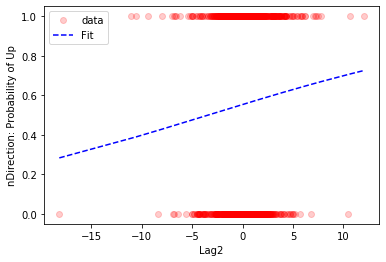

In [54]:
import numpy as np

plt.plot(df.Lag2, df.nDirection, 'ro', alpha=0.2, label='data')
plt.xlabel('Lag2')
plt.ylabel('nDirection: Probability of Up')

x1 = df.Lag2
y1 = model_2.predict(x1)
#print(y1)
# We are sorting the data because without sorting the data will be
# randomly connected by lines.
x2, y2 = zip(*sorted(zip(x1,y1)))
plt.plot(x2,y2, 'b--', label='Fit')
plt.legend(loc='best')
# We found out the logistic regression does not performed well
